In [436]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [437]:
df = pd.read_csv('housing.csv')

In [438]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.230,37.880,41.000,880.000,129.000,322.000,126.000,8.325,452600.000,NEAR BAY
1,-122.220,37.860,21.000,7099.000,1106.000,2401.000,1138.000,8.301,358500.000,NEAR BAY
2,-122.240,37.850,52.000,1467.000,190.000,496.000,177.000,7.257,352100.000,NEAR BAY
3,-122.250,37.850,52.000,1274.000,235.000,558.000,219.000,5.643,341300.000,NEAR BAY
4,-122.250,37.850,52.000,1627.000,280.000,565.000,259.000,3.846,342200.000,NEAR BAY


In [439]:
df = df.dropna()
df['ocean_proximity'].unique()
df = pd.get_dummies(df, columns=['ocean_proximity'])

In [440]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [441]:
scaler = MinMaxScaler()

df[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']] = scaler.fit_transform(
    df[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']])

In [442]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.230,37.880,0.784,0.022,0.020,0.009,0.021,0.540,0.902,0.000,0.000,0.000,1.000,0.000
1,-122.220,37.860,0.392,0.181,0.171,0.067,0.187,0.538,0.708,0.000,0.000,0.000,1.000,0.000
2,-122.240,37.850,1.000,0.037,0.029,0.014,0.029,0.466,0.695,0.000,0.000,0.000,1.000,0.000
3,-122.250,37.850,1.000,0.032,0.036,0.016,0.036,0.355,0.673,0.000,0.000,0.000,1.000,0.000
4,-122.250,37.850,1.000,0.041,0.043,0.016,0.042,0.231,0.675,0.000,0.000,0.000,1.000,0.000


In [443]:
X = df[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]
y= df[['median_house_value']]

In [444]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [385]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [262]:
coeff_df = pd.DataFrame(np.transpose(regressor.coef_), X.columns, columns=['Coefficient'])
coeff_df
#np.transpose(regressor.coef_).shape

,Coefficient
housing_median_age,0.125
total_rooms,-0.481
total_bedrooms,0.957
population,-3.256
households,1.196
median_income,1.208
ocean_proximity_<1H OCEAN,-0.045
ocean_proximity_INLAND,-0.184
ocean_proximity_ISLAND,0.285
ocean_proximity_NEAR BAY,-0.038


In [263]:
y_pred = regressor.predict(X_val)

In [264]:
y_pred

array([[0.3215384 ],
       [0.2622351 ],
       [0.27983086],
       ...,
       [0.47309737],
       [0.14289776],
       [0.49829707]])

In [265]:
pd.DataFrame(np.hstack((y_val.to_numpy(), y_pred.reshape(-1, 1))))

,0,1
0,0.179,0.322
1,0.175,0.262
2,0.232,0.280
3,0.299,0.358
4,0.158,0.302
...,...,...
4082,0.162,0.180
4083,0.184,0.349
4084,0.684,0.473
4085,0.259,0.143


In [266]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Mean Absolute Error: 0.10718616532823176
Mean Squared Error: 0.023102377789090616
Root Mean Squared Error: 0.1519946636862315


In [267]:
regressor.score(X_val,y_val)

0.6037881554274713

In [328]:
X_train.shape

(12259, 11)

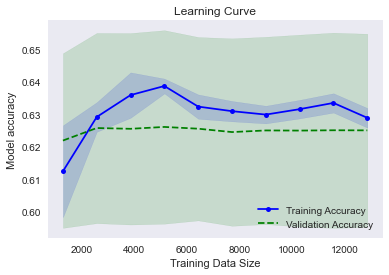

In [365]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline; This will be passed as an estimator to learning curve method
#
pipeline = make_pipeline(StandardScaler(),
                        LinearRegression())
#
# Use learning curve to get training and test scores along with train sizes
#
train_sizes, train_scores, val_scores = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [445]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

train_sizes = [1, 100, 500, 2000, 5000, 7654,11442]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(),
X = X_train,
y = y_train, train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [446]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-0.         -0.         -0.         -0.         -0.        ]
 [-0.02472922 -0.01754751 -0.01754751 -0.01754751 -0.01754751]
 [-0.02019139 -0.02177216 -0.02177216 -0.02177216 -0.02177216]
 [-0.02098878 -0.02198645 -0.02198645 -0.02198645 -0.02198645]
 [-0.02100404 -0.02106299 -0.020982   -0.020982   -0.020982  ]
 [-0.02082427 -0.02086701 -0.02075281 -0.02092201 -0.02092201]
 [-0.0207414  -0.02076489 -0.02066742 -0.02090426 -0.02088625]]

 ----------------------------------------------------------------------

Validation scores:

 [[-7.51075362e-02 -1.11020395e-01 -1.11347151e-01 -1.09015880e-01
  -1.07696420e-01]
 [-2.26590071e-02 -2.75572744e-02 -3.31855613e-02 -2.53423513e-02
  -2.59093399e-02]
 [-2.15470581e-02 -2.23087095e-02 -2.47551470e-02 -2.10874112e-02
  -2.17474540e-02]
 [-2.10587657e-02 -1.74097391e+22 -2.14387033e-02 -2.04472014e-02
  -2.06465953e-02]
 [-2.12154518e-02 -2.11068301e-02 -2.14862437e-02 -2.03083867e-02
  -2.04915154e-02]
 [-2.11286644e-02 -

In [447]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1       -0.000
100      0.019
500      0.021
2000     0.022
5000     0.021
7654     0.021
11442    0.021
dtype: float64

 --------------------

Mean validation scores

 1                            0.103
100                          0.027
500                          0.022
2000    3481947823221252292608.000
5000                         0.021
7654                         0.021
11442                        0.021
dtype: float64


(0.0, 40.0)

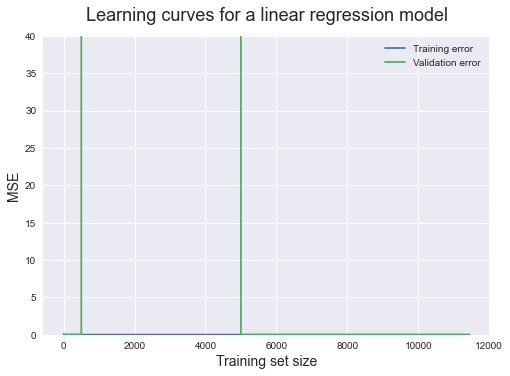

In [448]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)